<a href="https://colab.research.google.com/github/SatyamChand/EnergyEfficiency/blob/main/Regression_Energy_Efficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx', sheet_name='Φύλλο1')
dataset.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [ ]:
dataset.isna().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

# Visualization

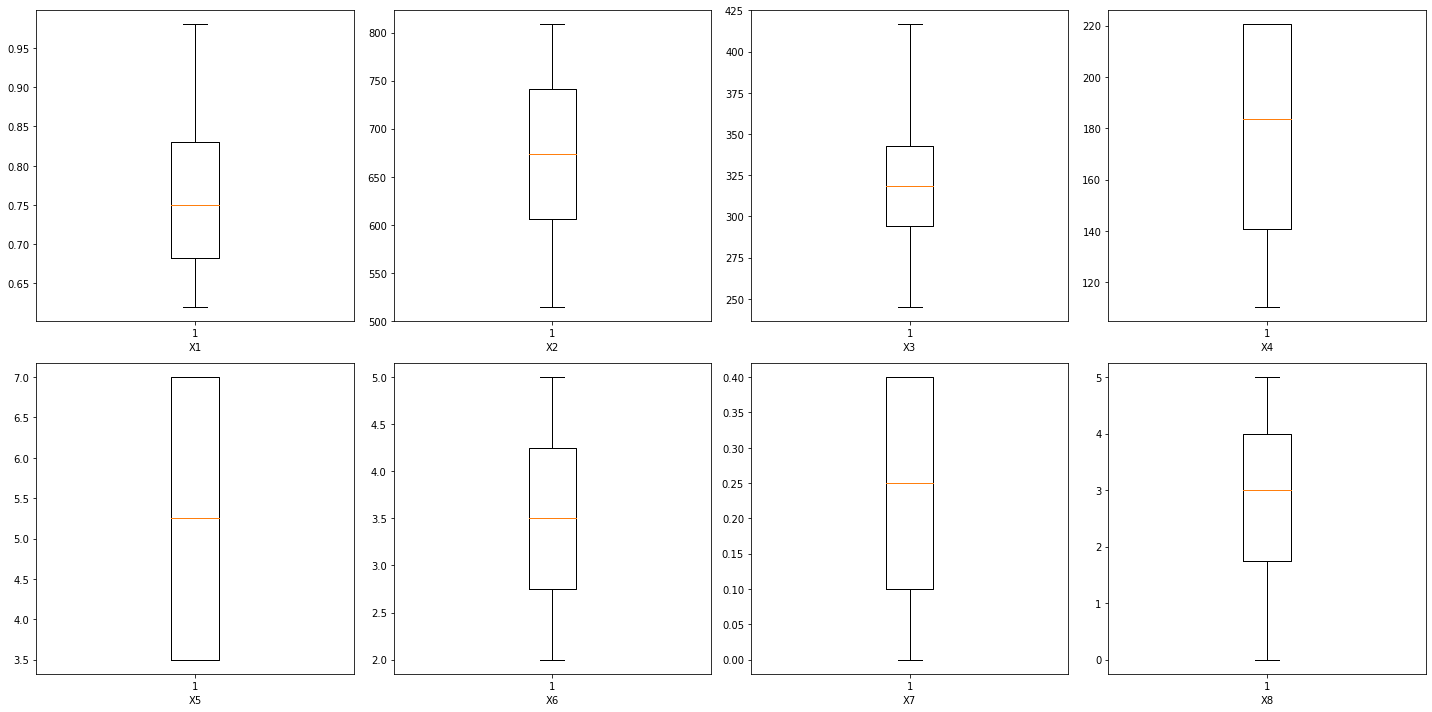

In [ ]:
plt.figure(figsize=(20,10))
for x in range(0,8):
    plt.subplot(2,4,x+1)
    plt.xlabel(dataset.columns[x])
    plt.boxplot(dataset[dataset.columns[x]])
plt.tight_layout()
plt.show()

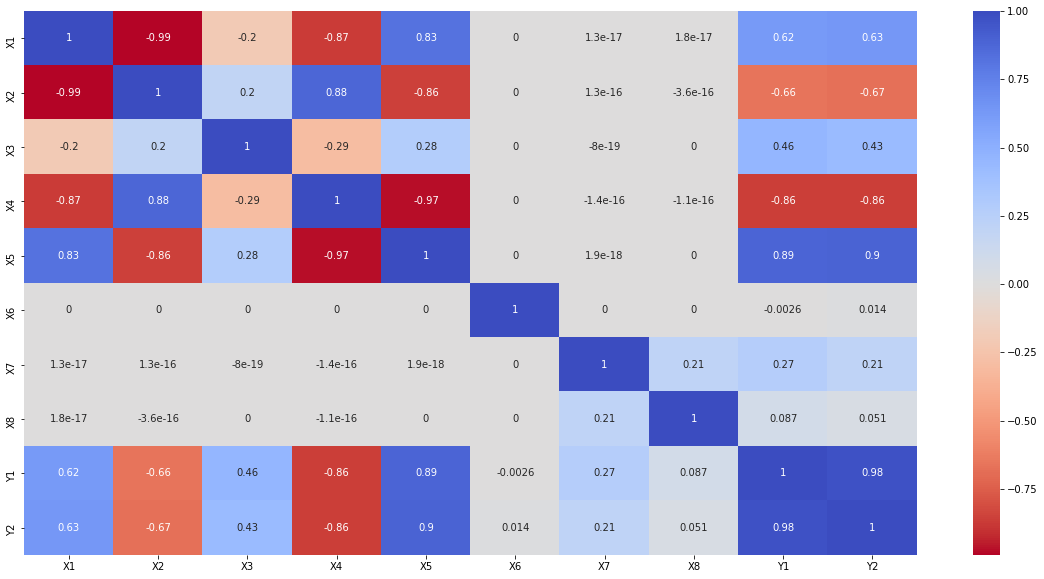

In [ ]:
corr = dataset.corr()
#print(corr)
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap = sns.color_palette("coolwarm_r", as_cmap=True))
plt.show()

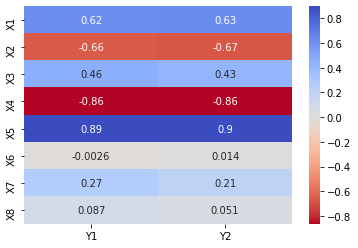

In [ ]:
corr = corr[['Y1','Y2']][:'X8']
#print(corr)
sns.heatmap(corr, annot=True, cmap = sns.color_palette("coolwarm_r", as_cmap=True))
plt.show()

# Set Up

In [ ]:
data_y = dataset[['Y1','Y2']]
#data_x = dataset.drop(columns=['X3','X6','X7','X8','Y1','Y2'])
data_x = dataset.drop(columns=['Y1','Y2'])
print(data_x.shape,data_y.shape)

(768, 8) (768, 2)


In [ ]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(data_x, data_y, train_size=0.7)
print(train_x.shape,train_y.shape,test_x.shape,test_y.shape)

(537, 8) (537, 2) (231, 8) (231, 2)


In [ ]:
train_y1,train_y2 = train_y['Y1'], train_y['Y2']
test_y1,test_y2 = test_y['Y1'], test_y['Y2']

In [ ]:
from sklearn.metrics import r2_score

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [ ]:
lr.fit(train_x,train_y)
print(r2_score(lr.predict(test_x),test_y))

0.8992684044728227


# Polynomial ( 2nd Degree )

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_2 = PolynomialFeatures(degree=2)
poly_2.fit(train_x)
train_x_2 = poly_2.transform(train_x)

In [ ]:
test_x_2 = poly_2.transform(test_x)

In [ ]:
polyr2 = LinearRegression()

polyr2.fit(train_x_2,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
polyr2.fit(train_x_2,train_y)
print(r2_score(polyr2.predict(test_x_2),test_y))

0.9773659211971677


# Polynomial ( 3rd Degree )

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_3 = PolynomialFeatures(degree=3)
poly_3.fit(train_x)
train_x_3 = poly_3.transform(train_x)
test_x_3 = poly_3.transform(test_x)

In [ ]:
polyr3 = LinearRegression()

polyr3.fit(train_x_3,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
polyr3.fit(train_x_3,train_y1)
print(r2_score(polyr3.predict(test_x_3),test_y1))
polyr3.fit(train_x_3,train_y2)
print(r2_score(polyr3.predict(test_x_3),test_y2))
polyr3.fit(train_x_3,train_y)
print(r2_score(polyr3.predict(test_x_3),test_y))

0.9977353085074632
0.9684484155357892
0.9829529107736164


# Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=0.1)

In [ ]:
rr.fit(train_x,train_y)
print(r2_score(rr.predict(test_x),test_y))

0.898486500886807


# Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

lassor = Lasso(alpha=0.01)

In [ ]:
lassor.fit(train_x,train_y)
print(r2_score(lassor.predict(test_x),test_y))

0.8952140329548323


# ElasticNet Regression

In [ ]:
from sklearn.linear_model import ElasticNet

enr = ElasticNet(alpha=0.1)

In [ ]:
enr.fit(train_x,train_y)
print(r2_score(enr.predict(test_x),test_y))

0.8242373386898094


# Random Forest Tree

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

In [ ]:
rfr.fit(train_x,train_y)
print(r2_score(enr.predict(test_x),test_y))

0.8242373386898094


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

In [ ]:
dtr.fit(train_x,train_y1)
print(r2_score(dtr.predict(test_x),test_y1))
dtr.fit(train_x,train_y2)
print(r2_score(dtr.predict(test_x),test_y2))
dtr.fit(train_x,train_y)
print(r2_score(dtr.predict(test_x),test_y))

0.9970287669871429
0.9450380675046313
0.9649255025947852


In [ ]:
# with parameter tuning 
dtmodel = DecisionTreeRegressor(max_depth=7, min_impurity_decrease=0.044 )

dtmodel.fit(train_x,train_y1)
print(r2_score(dtmodel.predict(test_x),test_y1))
dtmodel.fit(train_x,train_y2)
print(r2_score(dtmodel.predict(test_x),test_y2))
dtmodel.fit(train_x,train_y)
print(r2_score(dtmodel.predict(test_x),test_y))

0.9952381477545252
0.9560841512132349
0.9795720828654821


# Result Analysis

In [ ]:
score_lis = []
model_lis = ['Linear','Poly(2)','Poly(3)','Ridge','Lasso','ElasticNet','RF','DT','Tuned DT']
,,,,,,,,
score_lis.append(r2_score(lr.predict(test_x),test_y))
score_lis.append(r2_score(polyr2.predict(test_x_2),test_y))
score_lis.append(r2_score(polyr3.predict(test_x_3),test_y))
score_lis.append(r2_score(rr.predict(test_x),test_y))
score_lis.append(r2_score(lassor.predict(test_x),test_y))
score_lis.append(r2_score(enr.predict(test_x),test_y))
score_lis.append(r2_score(rfr.predict(test_x),test_y))
score_lis.append(r2_score(dtr.predict(test_x),test_y))
score_lis.append(r2_score(dtmodel.predict(test_x),test_y))

In [ ]:
print(score_lis)

[0.8992684044728227, 0.9773659211971677, 0.9829529107736164, 0.898486500886807, 0.8952140329548323, 0.8242373386898094, 0.9775282403581451, 0.9649255025947852, 0.9795720828654821]


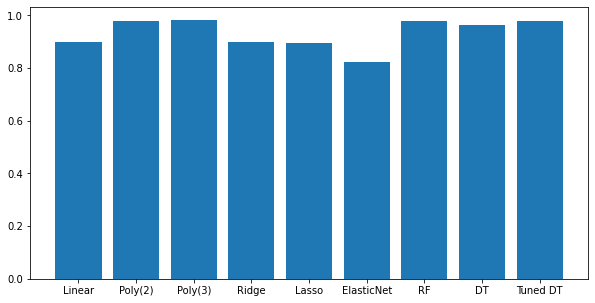

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(model_lis, score_lis)
plt.show()

From the above obervations we can say that the Polynomial Regression for degree 3 worked the best in our finding with an accuracy of ~0.98295 (or 98.3%)